In [2]:
!pip install pafy
!sudo pip install --upgrade youtube_dl

Requirement already up-to-date: youtube_dl in /usr/local/lib/python3.7/dist-packages (2021.6.6)


In [9]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pafy
import time

url = 'https://youtu.be/A9BVr7kltl8'
vPafy = pafy.new(url)
# print(vPafy)
play = vPafy.getbest()
TIMER = 3

vcap = cv2.VideoCapture(play.url)
if not vcap.isOpened():
    print("File Cannot be Opened")

while(True):
    # Capture frame-by-frame
    ret, frame = vcap.read()
    prev = time.time()

    while TIMER >= 0:
            ret, frame = vcap.read()

            # current time
            cur = time.time()
 
            # Update and keep track of Countdown
            # if time elapsed is one second
            # than decrease the counter
            if cur-prev >= 1:
                prev = cur
                TIMER = TIMER-1

    ret, frame = vcap.read()
    break;

# When everything done, release the capture
vcap.release()
cv2.destroyAllWindows()


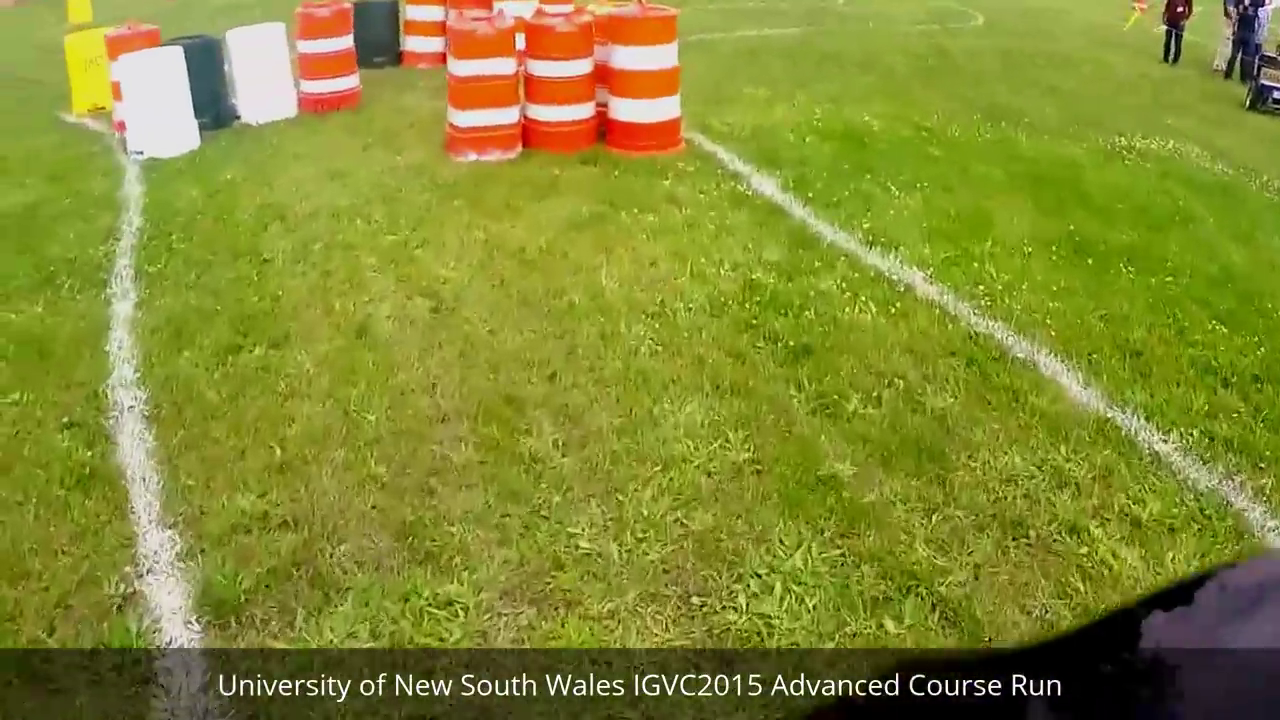

In [10]:
# frame = cv2.resize(frame, (0, 0), fx = 0.4, fy = 0.4)
cv2_imshow(frame)

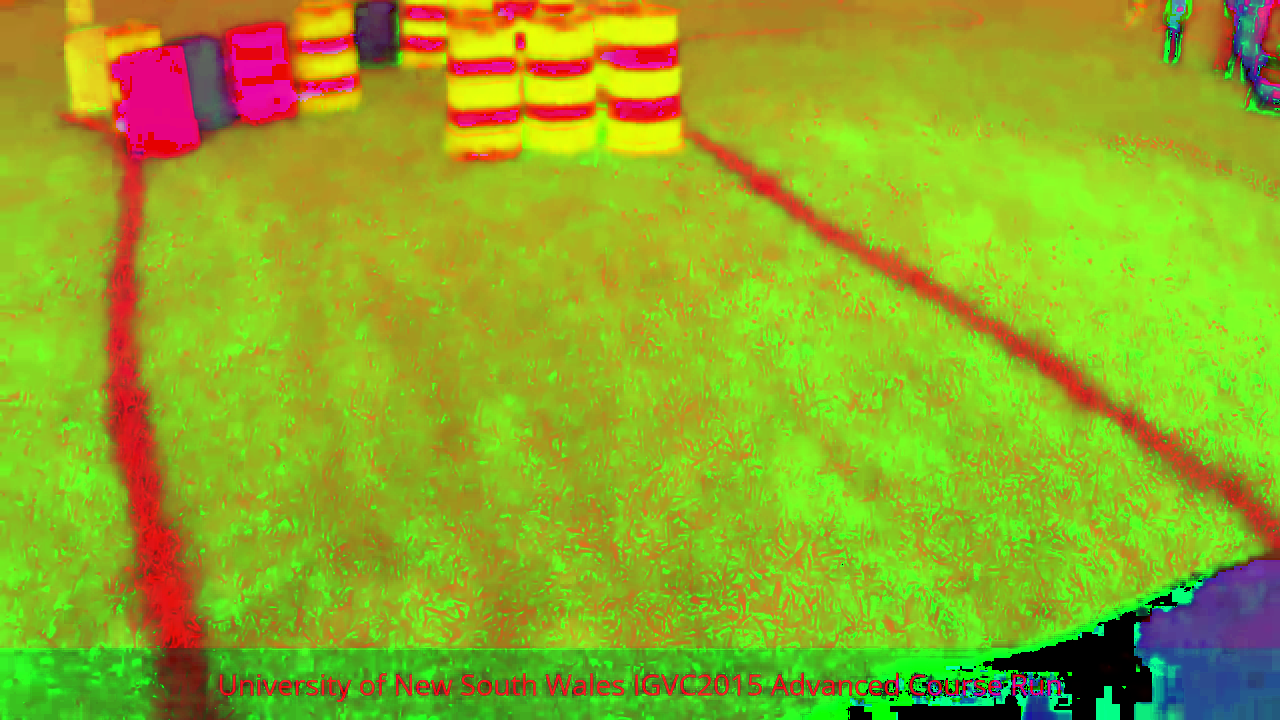

In [11]:
hsv_img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_img)

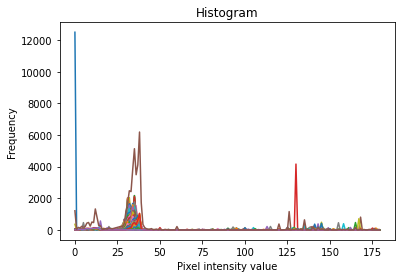

In [26]:
hist = cv2.calcHist([hsv_img], [0, 1], None, [180, 256], [0, 180, 0,256])
plt.figure(),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Frequency'),plt.title('Histogram')
plt.show()

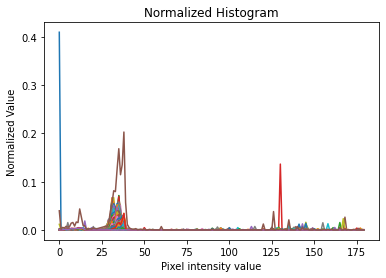

In [27]:
cv2.normalize(hist, hist)
plt.figure(),plt.plot(hist),plt.xlabel('Pixel intensity value'),plt.ylabel('Normalized Value'),plt.title('Normalized Histogram')
plt.show()

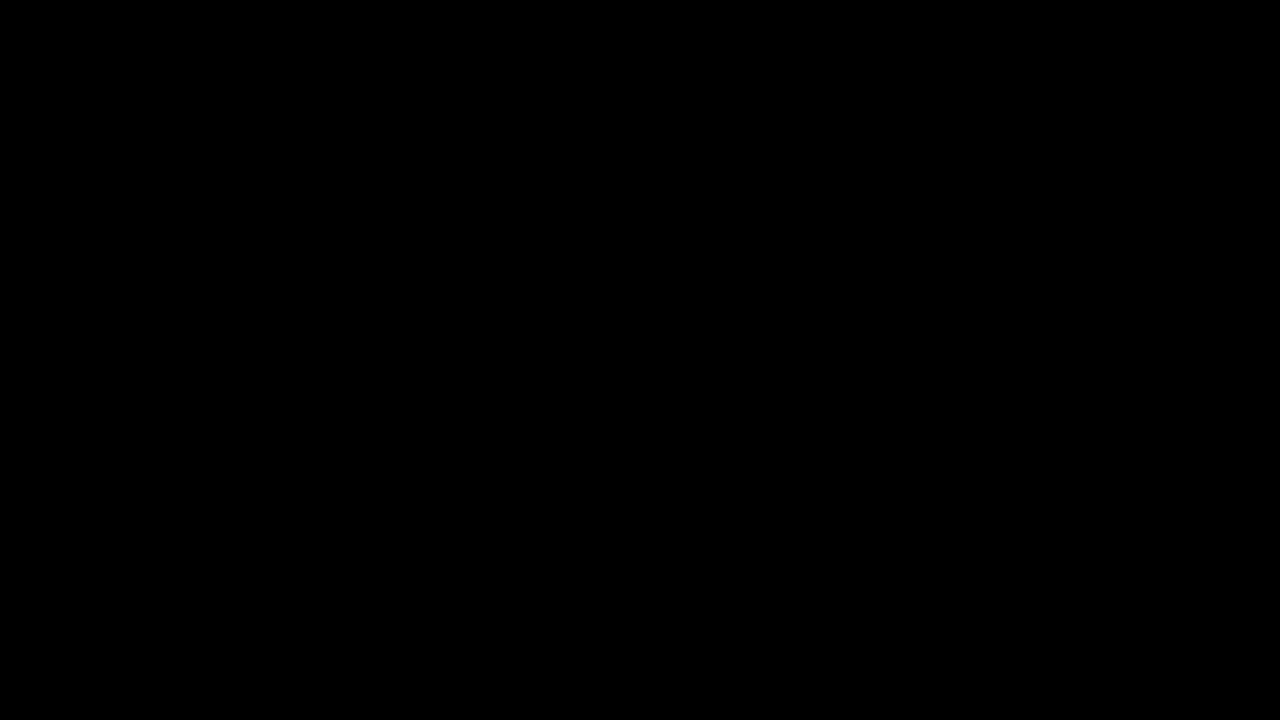

In [28]:
res = cv2.calcBackProject([hsv_img], [0, 1], hist, [0, 180, 0, 256], 1)
# cv2_imshow(res)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection

ret,thresh = cv2.threshold(res,0,255,cv2.THRESH_TOZERO)
final = cv2.merge((thresh,thresh,thresh)) 
# cv2_imshow(final)
result = cv2.bitwise_and(frame,final)
cv2_imshow(result)